In [ ]:
!pip install pyxlsb

from io import BytesIO
from pyxlsb import open_workbook

In [ ]:

# Librerias necesarias
import pandas as pd
import requests
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')


# URL del archivo de histórico 2012 a 2023
url = "https://files.conagua.gob.mx/aguasnacionales/TODOS%20LOS%20MONITOREOS.xlsb"

In [ ]:
response = requests.get(url)
file = BytesIO(response.content)

# Leer el archivo
with open_workbook(file) as wb:
    " Página 2 donde estan los resultados"
    df = pd.read_excel(file, engine='pyxlsb', sheet_name=1, parse_dates=['FECHA REALIZACIÓN'])

<ipython-input-3-10f60a29da5a>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_excel(file, engine='pyxlsb', sheet_name=1, parse_dates=['FECHA REALIZACIÓN'])


In [ ]:
with open_workbook(file) as wb:
    " Página 1 donde estan los sitios"
    df1 = pd.read_excel(file, engine='pyxlsb', sheet_name=0)

In [ ]:
ALL_POLLUTANTS = [
 'ALC_FEN',
 'ALC_TOT',
 'CO3',
 'HCO3',
 'OH',
 'CLOROF_A',
 'COLI_FEC',
 'COLI_TOT',
 'E_COLI',
 'COT',
 'COT_SOL',
 'DBO_SOL',
 'DBO_TOT',
 'DQO_SOL',
 'DQO_TOT',
 'N_NH3',
 'N_NO2',
 'N_NO3',
 'N_ORG',
 'N_TOT',
 'N_TOTK',
 'TOX_D_48_UT',
 'TOX_D_48_SUP_UT',
 'TOX_D_48_FON_UT',
 'TOX_FIS_SUP_15_UT',
 'TOX_FIS_SUP_30_UT',
 'TOX_FIS_SUP_5_UT',
 'TOX_FIS_FON_15_UT',
 'TOX_FIS_FON_30_UT',
 'TOX_FIS_FON_5_UT',
 'TOX_V_15_UT',
 'TOX_V_30_UT',
 'TOX_V_5_UT',
 'AOXF',
 'AOXP',
 'AOXT',
 'P_TOT',
 'PO4_TOT',
 'ORTO_PO4',
 'COLOR_VER',
 'TRANSPARENCIA',
 'ABS_UV',
 'SDT',
 'CONDUC_CAMPO',
 'CONDUC_CAMPO_SUP',
 'CONDUC_CAMPO_MED',
 'CONDUC_CAMPO_FON',
 'pH_CAMPO',
 'pH_CAMPO_SUP',
 'pH_CAMPO_MED',
 'pH_CAMPO_FON',
 'SALINIDAD_SUP',
 'SALINIDAD_MED',
 'SALINIDAD_FON',
 'OD_%',
 'OD_mg/L',
 'OD_%_SUP',
 'OD_mg/L_SUP',
 'OD_%_MED',
 'OD_mg/L_MED',
 'OD_%_FON',
 'OD_mg/L_FON',
 '1,1,1,2_TTCETA',
 '1,1,2,2_TETRACLETAN',
 '1,1,2_TCETA',
 '1,1_DICLETILEN',
 '1,2,4_TRICLBENCEN',
 '1,2_DIBR_3_CLPROPAN',
 '1,2_DICLETAN',
 '1,2_DICLPROPAN',
 '1,2_DIFENILHIDRACINA',
 '1_C_NAF',
 '2,3_DICLOROFENOL_DCF',
 '2,4,5_T',
 '2,4,5_TRICLOROFENOL',
 '2,4,6_TRICLFENOL',
 '2,4_D_D_C_FENOXIACETICO',
 '2,4_DICLFENOL',
 '2,4_DIMETILFEN',
 '2,4_DINITOL',
 '2,4_DNF',
 '2,6_DINTOL',
 '2_CEVE',
 '2_CF',
 '2_CLNAFT',
 '2_NIFENOL',
 '4_BRFENFENETER',
 '4_NITROFENOL',
 'ACENAF',
 'ACENAFTIL',
 'ANTRA',
 'BEN_A_ANT',
 'BEN_A_PIR',
 'BEN_B_FANT',
 'BEN_G,H,I_PER',
 'BEN_K_FANT',
 'CRISENO',
 'DIBEN_ANT',
 'FENANTRENO',
 'FLUORANTENO',
 'FLUORENO',
 'IND_PIR',
 'NAFTALENO',
 'PIRENO',
 'HAPS',
 'ACRILONITRILO',
 'ACROLEINA',
 'AL_TOT',
 'ALACLOR',
 'ALDICARB',
 'ALDRIN',
 'ATRAZINA',
 'B_TOT',
 'B2_ETILHEXIL_FTALATO',
 'BA_TOT',
 'BE_TOT',
 'BENCENO',
 'BENCIDINA',
 'BIS2_CLETETER',
 'BIS2_CLIOISOPET',
 'BOLSTAR',
 'BPCS',
 'BR_CLMET',
 'BROMOMETANO',
 'CARBOFURANO',
 'CIS_1,2_DICLETEN',
 'CL_BENC',
 'CL_METILENO',
 'CL_RES',
 'CLORATALONIL',
 'CLORDANO',
 'CLOROMETANO',
 'CLOROTOLURON',
 'CLORPIRYFOS',
 'CLORURO_DE_VINILO',
 'CLORUROS_TOT',
 'COUMAFOS',
 'CR_HEX',
 'CYANACINA',
 'DALAPON',
 'DDD',
 'DDE',
 'DDT',
 'DELTAMETRINA',
 'DEMETON_S',
 'DI_2_ETILEXIL_ADIPATO',
 'DIAZINON',
 'DICAMBA',
 'DICLORVOS',
 'DIELDRIN',
 'DIET_FTAL',
 'DIMETIL_FTAL',
 'DIMETOATO',
 'DINITRO_O_CRESOL',
 'DINOSEB',
 'DIURON',
 'END_ALD',
 'ENDO_SUL',
 'ALFA_ENDO',
 'BETA_ENDO',
 'ENDO_SULSO4',
 'ENDRIN',
 'ENTEROC_FEC',
 'EPN',
 'ESTIRENO',
 'ETILBENCENO',
 'ETOPROP',
 'FE_TOT',
 'FENITROTION',
 'FENOL',
 'FENOLES_TOT',
 'FENSULFOTION',
 'FENTION',
 'FLUORUROS_TOT',
 'FORATO',
 'GLIFOSATO',
 'GRAS_ACEI',
 'H_HELMINTOS',
 'HEPTA_EPOX',
 'HEPTACLOR',
 'HEXACL_BENC',
 'HEXACL_BUT',
 'HEXACL_CICLOPEN',
 'HEXACL_ETANO',
 'ISO_FOR',
 'ISOPROTURON',
 'K_TOT',
 'LINURON',
 'MALATION',
 'MAT_FLOTANTE',
 'MCPA',
 'MERFOS',
 'METIL_AZINF_GUT',
 'METILPARATION',
 'METILTERBUTILETER_MTBE_',
 'METOLACLOR',
 'METOXICLO',
 'MEVINFOS',
 'MIREX',
 'MN_TOT',
 'MO_TOT',
 'MOLINATO',
 'N_NITROS_DIMETILA',
 'N_NITROS_N_PROPAM',
 'N_NITROSODIFENILAMINA',
 'NA_TOT',
 'NITROBENCENO',
 'OXAMIL',
 'PARATION',
 'PCBEN',
 'PENDIMETALIN',
 'PENTACLOROFENOL',
 'PICLORAN',
 'PIRYPROXYFEN',
 'RONNEL',
 'SAAM',
 'SB_TOT',
 'SE_TOT',
 'SILVEX',
 'SIMAZINA',
 'SIO2',
 'SO4_TOT',
 'SOLID_SED',
 'SST',
 'SULFOTEP',
 'SULFUROS_TOT',
 'TALIO',
 'TERBUFOS',
 'TERBUTILAZINA',
 'TETRACL_CARB',
 'TETRACLOROETILENO_',
 'TOKUTION',
 'TOLUENO',
 'TOXAFENO',
 'TRANS_1,2_DICLOROETILENO',
 'TRIALATO',
 'TRICLORANATO',
 'TRICLORFON',
 'TRICLOROETILENO',
 'TRICLOROFLUOROMETANO',
 'TRIFLURALIN',
 'TURBIEDAD',
 'AS_TOT',
 'CD_TOT',
 'CR_TOT',
 'HG_TOT',
 'NI_TOT',
 'PB_TOT',
 'CN_TOT',
 'CU_TOT',
 'ZN_TOT',
 'POT_REDOX_CAMPO',
 'POT_REDOX_CAMPO_FON',
 'POT_REDOX_CAMPO_MED',
 'POT_REDOX_CAMPO_SUP',
 'ACENAF_8310',
 'ACENAFTIL_8310',
 'ANTRA_8310',
 'BEN_A_ANT_8310',
 'BEN_A_PIR_8310',
 'BEN_B_FANT_8310',
 'BEN_G,H,I_PER_8310',
 'BEN_K_FANT_8310',
 'CRISENO_8310',
 'DIBEN_ANT_8310',
 'FENANTRENO_8310',
 'FLUORANTENO_8310',
 'FLUORENO_8310',
 'IND_PIR_8310',
 'NAFTALENO_8310',
 'PIRENO_8310',
 'HAPS_8310',
 '1,2_DICLBENC',
 '1,3_DICLBEN',
 '1,4_DICLBEN',
 'DICLOROBENCENOS',
 'BR_DICLMET',
 'BROMOF',
 'CLOROFORMO',
 'DIBR_CLMET',
 'THMs',
 'M,P_XILENO',
 'O_XILENO',
 'XILEN_ISOMEROS',
 'ALFA_BHC',
 'BETA_BHC',
 'GAMA_BHC_LIN',
 'DELTA_BHC',
 'BHC_ISOMEROS',
 'CA_TOT',
 'MG_TOT',
 'DUR_TOT',
 'TEMP_AMB',
 'TEMP_AGUA',
 'TEMP_AGUA_SUP',
 'TEMP_AGUA_MED',
 'TEMP_AGUA_FON',
 'PROFUNDIDAD',
 'CAUDAL',
 'CLORUROS_SOL',
 'FLUORUROS_SOL',
 'SO4_SOL',
 'AS_SOL',
 'CD_SOL',
 'CR_SOL',
 'FE_SOL',
 'MN_SOL',
 'HG_SOL',
 'PB_SOL',
 'ZN_SOL',
 'AL_SOL',
 'CU_SOL',
 'TALIO_SOL',
 'NI_SOL',
 'CA_SOL',
 'MG_SOL',
 'K_SOL',
 'NA_SOL',
 'SULFUROS_SOL',
 'BA_SOL',
 'SB_SOL',
 'AG_TOT',
 'S',
 'AMPA',
 'V_TOT',
 'SE',
 'SSV',
 'C.MESÓFILOS AEROBIOS',
 'DUR_Ca',
 'DUR_Mg',
 'NH4',
 'ST',
 'DIBR_MET',
 'DIBROMOETILENO',
 'S_TOT',
 '1,1-DICLOROPROPILENO',
 '1,2,3_TRICLBENCEN',
 '1,2-DIBR_ETA',
 '1,3,5-TRIMETILBENCENO',
 '1,3_DICLPROPAN',
 '2_CLOROTOLUENO',
 '2_METILFEN',
 '4_CLOROTOLUENO',
 '4-ISOPROPILTOLUENO',
 'ALC_A',
 'AZOBENCENO',
 'BIS_2_CLOROETOXI_MET',
 'BISMUTO',
 'BROMATOS',
 'BROMOBENCENO',
 'BUTILBENCILFTALATO',
 'CARBAZOLA',
 'CIS-CLORDANO',
 'CLORAMINAS_COMO_CL2_',
 'CLORITOS',
 'CLOROF_B',
 'CLOROF_C',
 'CO_TOT',
 'COLOR_APA',
 'COLOR_VER_436',
 'COLOR_VER_525',
 'COLOR_VER_620',
 'COMP_ORG_NO_HALOG_FID_CONH',
 'CONDUC_LAB',
 'COP',
 'DIBENZOFURANO',
 'DIBUTILFTALATO (DBP)',
 'DICLOROMETANO',
 'DI-OCTILFTALATO',
 'DIQUAT',
 'ENDOSULFAN II',
 'ENDOTAL',
 'ENDRÍN CETONA',
 'HIDROCAR_F_MED',
 'HIDROCAR_F_PES',
 'ISOPROPILBENCENO',
 'Li_TOT',
 'N_NO3-N_NO2',
 'N_ORG_SOL',
 'N-BUTILBENCENO',
 'N-PROPILBENCENO',
 'O-NITROANILINA',
 'P_INORG',
 'P_INORG_DIS',
 'P_ORG',
 'P-CLOROANILINA',
 'pH_LAB',
 'SALINIDAD ',
 'SDF',
 'SDV',
 'SEC-BUTILBENCENO',
 'SN_TOT',
 'SR_TOT',
 'SSF',
 'STF',
 'STV',
 'TALIO_TOT',
 'TER-BUTILBENCENO',
 'Ti_TOT',
 'TRANS-CLORDANO',
 'FORMALDEHIDO',
 'CLORATOS',
 'ACID_CLOROACE',
 'ACID_DICLOROACE',
 'ACID_TRICLOROACE'
 ]

In [ ]:
POLLUTANTS = ['OD_mg/L', 'DBO_TOT', 'DQO_TOT', 'COLI_FEC', 'E_COLI', 'N_TOT', 'P_TOT', 'TOX_D_48_UT', 'TOX_FIS_SUP_15_UT']
MUNICIPALITY = ['ARIZPE', 'BANÁMICHI', 'HUÉPAC', 'ACONCHI', 'SAN FELIPE', 'BAVIÁCORA', 'URES', 'CANANEA']


In [ ]:
# Merging df_water_site and df_water_result DataFrames using 'CLAVE SITIO' as the key.
df_water_merged = pd.merge(
    df,
    df1,
    on='CLAVE SITIO',
    how='inner'
)

# Select the columns required for the study
df_water_merged_filtered = df_water_merged[
    ['CLAVE SITIO', 'ESTADO', 'MUNICIPIO', 'CUERPO DE AGUA', 'TIPO CUERPO DE AGUA', 'SUBTIPO CUERPO AGUA', 'LATITUD', 'LONGITUD', 'FECHA REALIZACIÓN'] +
    ALL_POLLUTANTS
]

# Convert the 'FECHA REALIZACIÓN' column to the correct datetime format
# First convert the column to numeric
df_water_merged_filtered['FECHA REALIZACIÓN'] = pd.to_numeric(df_water_merged_filtered['FECHA REALIZACIÓN'], errors='coerce')

# Then convert to dates from Excel origin
df_water_merged_filtered['FECHA REALIZACIÓN'] = pd.to_datetime(
    df_water_merged_filtered['FECHA REALIZACIÓN'],
    origin='1899-12-30',
    unit='D'
)

# Filter the DataFrame to obtain only the records of the water bodies that are not "COASTAL" of the affected municipalities of the state of Sonora.
df_water_filtered_sonora = df_water_merged_filtered[
    (df_water_merged['ESTADO'] == 'SONORA') &
    (df_water_merged['MUNICIPIO'].isin(MUNICIPALITY))
]
df_water_filtered_sonora = df_water_filtered_sonora[
    ~df_water_filtered_sonora['TIPO CUERPO DE AGUA'].str.contains('COSTERO', na=False)
]

# Clean the columns of pollutants by removing the '>' and '<' symbols and converting them to numeric
for column in ALL_POLLUTANTS:
    if column in df_water_filtered_sonora.columns:
        df_water_filtered_sonora[column] = df_water_filtered_sonora[column].astype(str)
        df_water_filtered_sonora[column] = (
            df_water_filtered_sonora[column]
            .str.replace('<', '', regex=False)
            .str.replace('>', '', regex=False)
        )
        df_water_filtered_sonora[column] = pd.to_numeric(df_water_filtered_sonora[column], errors='coerce')

# Sort by 'CLAVE SITIO' and 'FECHA REALIZACIÓN' in ascending order
df_water_filtered_sonora.sort_values(
    by=['CLAVE SITIO', 'FECHA REALIZACIÓN'],
    ascending=True,
    inplace=True,
    ignore_index=True
)

<ipython-input-7-01983438a8e9>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_water_merged_filtered['FECHA REALIZACIÓN'] = pd.to_numeric(df_water_merged_filtered['FECHA REALIZACIÓN'], errors='coerce')
<ipython-input-7-01983438a8e9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_water_merged_filtered['FECHA REALIZACIÓN'] = pd.to_datetime(


In [ ]:
df_water_filtered_sonora

,CLAVE SITIO,ESTADO,MUNICIPIO,CUERPO DE AGUA,TIPO CUERPO DE AGUA,SUBTIPO CUERPO AGUA,LATITUD,LONGITUD,FECHA REALIZACIÓN,ALC_FEN,...,STV,TALIO_TOT,TER-BUTILBENCENO,Ti_TOT,TRANS-CLORDANO,FORMALDEHIDO,CLORATOS,ACID_CLOROACE,ACID_DICLOROACE,ACID_TRICLOROACE
0,MET-001,SONORA,ARIZPE,ACUÍFERO BACANUCHI,SUBTERRÁNEO,POZO,30.603729,-110.226908,2021-09-07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MET-001,SONORA,ARIZPE,ACUÍFERO BACANUCHI,SUBTERRÁNEO,POZO,30.603729,-110.226908,2022-07-25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MET-001,SONORA,ARIZPE,ACUÍFERO BACANUCHI,SUBTERRÁNEO,POZO,30.603729,-110.226908,2023-12-05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MET-003,SONORA,ARIZPE,RIO BACANUCHI,LÓTICO,RÍO,30.575670,-110.220880,2022-07-25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MET-010,SONORA,ARIZPE,ACUÍFERO RÍO SONORA,SUBTERRÁNEO,POZO,30.347310,-110.157320,2021-10-26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,OCNOR6275,SONORA,CANANEA,ACUÍFERO SAN PEDRO,SUBTERRÁNEO,POZO,31.085050,-110.111870,2022-08-15,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
469,OCNOR6506,SONORA,URES,ACUÍFERO RÍO SONORA,SUBTERRÁNEO,POZO,29.424050,-110.382940,2020-10-31,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
470,TOMA DOMICILIARIA ACONCHI,SONORA,ACONCHI,ACUÍFERO RIO SONORA,SUBTERRÁNEO,TOMA DOMICILIARIA,29.821510,-110.227020,2022-08-11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
471,TOMA DOMICILIARIA BACANUCHI ESCUELA,SONORA,ARIZPE,ACUÍFERO RIO BACANUCHI,SUBTERRÁNEO,TOMA DOMICILIARIA,30.605670,-110.235830,2022-07-25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Calculate the threshold of 70% of the DataFrame length
threshold = len(df_water_filtered_sonora) * 0.7

# Remove columns with more than 70% null data
df_drop_water_sonora = df_water_filtered_sonora.dropna(axis=1, thresh=threshold)

In [ ]:
# Select the remaining columns of pollulants after removing the columns with some amount of null data
df_pollulants = df_drop_water_sonora .drop(columns=['CLAVE SITIO', 'ESTADO', 'MUNICIPIO', 'CUERPO DE AGUA',
                                                 'TIPO CUERPO DE AGUA', 'SUBTIPO CUERPO AGUA',
                                                 'LATITUD', 'LONGITUD', 'FECHA REALIZACIÓN'])
# df_drop_water_sonora.loc[:, selected_cols].columns
df_pollulants

,COLI_FEC,E_COLI,COT,DBO_TOT,DQO_TOT,N_NH3,N_NO2,N_NO3,N_ORG,N_TOT,...,AS_TOT,CD_TOT,CR_TOT,HG_TOT,NI_TOT,PB_TOT,DUR_TOT,TEMP_AMB,TEMP_AGUA,CAUDAL
0,10.0,NaN,1.3280,NaN,NaN,0.053263,0.005,1.706396,0.32898,2.088639,...,0.0015,0.001301,0.0012,0.000201,0.00042,0.00154,507.3396,33.0,22.1,NaN
1,10.0,NaN,NaN,NaN,NaN,NaN,NaN,1.738000,NaN,NaN,...,0.0015,0.001301,0.0012,0.000201,0.00042,0.00154,514.0000,30.0,22.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0020,0.001000,0.0020,0.000701,0.00200,0.00200,NaN,NaN,NaN,NaN
3,1658.0,1274.0,NaN,2.0,10.0,NaN,NaN,NaN,NaN,NaN,...,0.0015,0.001301,0.0060,0.000201,0.01700,0.00154,NaN,29.0,29.0,337.0
4,10.0,NaN,0.4537,NaN,NaN,0.078194,0.005,1.054546,1.16265,2.295390,...,0.0015,0.001301,0.0012,0.000201,0.00042,0.00154,345.0658,29.0,19.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,31.0,NaN,NaN,NaN,NaN,NaN,NaN,0.784000,NaN,NaN,...,0.0015,0.001301,0.0060,0.000201,NaN,0.00154,92.4000,27.0,24.0,NaN
469,10.0,NaN,0.8487,NaN,NaN,0.032294,0.005,5.602367,0.01774,5.652401,...,0.0015,0.001301,0.0056,0.000201,0.00042,0.00154,190.0259,32.0,27.7,NaN
470,10.0,NaN,NaN,NaN,NaN,NaN,NaN,5.164000,NaN,NaN,...,0.0080,0.001301,0.0012,0.000201,0.00042,0.00154,404.0000,32.0,27.0,NaN
471,10.0,NaN,NaN,NaN,NaN,NaN,NaN,1.602000,NaN,NaN,...,0.0015,0.001301,0.0012,0.000201,0.00042,0.00154,522.0000,27.0,25.0,NaN


In [ ]:
# Function to plot heatmap
def heatmap_plot(df, title, vmin = -1, vmax = 1, cmap = 'coolwarm'):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df, vmin = vmin, vmax = vmax, annot=True, cmap = cmap)
    plt.title(title)
    plt.show()

In [ ]:
# Function to calculate correlation of non-null data
def nonnull_correlation(df, lst, max_missing_ratio = 1, method = 'pearson', plthm = True):

    corr = pd.DataFrame()

    # Calculate the percentage of missing data per column
    missing_ratio = df.isnull().mean()

    # Filter columns with a missing data ratio less than the given threshold
    eligible_columns = missing_ratio[missing_ratio <= max_missing_ratio].index

    if len(eligible_columns) == 0:
        # best_corrs[element] = (None, None)
        raise RuntimeError("No eligible columns, try with other max_missing_ratio")

    # Calculate correlation only with eligible columns
    correlations = df[eligible_columns].corr(method = method)
    corr = correlations[lst]

    if plthm:
        heatmap_plot(corr, 'Correlation Heatmap (without NaN values)', -1, 1)

    return corr

In [ ]:
def nullity_correlation(df, lst, method = 'pearson', plthm = True):

    # Select columns that contain at least one null value
    df_null = df.iloc[:, [i for i, n in enumerate(np.var(df.isnull(), axis='rows')) if n > 0]]

    # Calculate correlation
    corr = df_null.isnull().corr(method = method)[lst]

    if plthm:
        heatmap_plot(corr, 'Correlation Heatmap for NaN values', -1, 1)

    return corr

In [ ]:
df_pollulants.corr()['DBO_TOT'].sort_values(ascending=False).head(10)

,DBO_TOT
DBO_TOT,1.000000
NI_TOT,0.723161
CD_TOT,0.645818
ORTO_PO4,0.640042
COLOR_VER,0.635674
DQO_TOT,0.551144
SAAM,0.517175
P_TOT,0.438070
N_TOTK,0.398521
N_NH3,0.384636


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

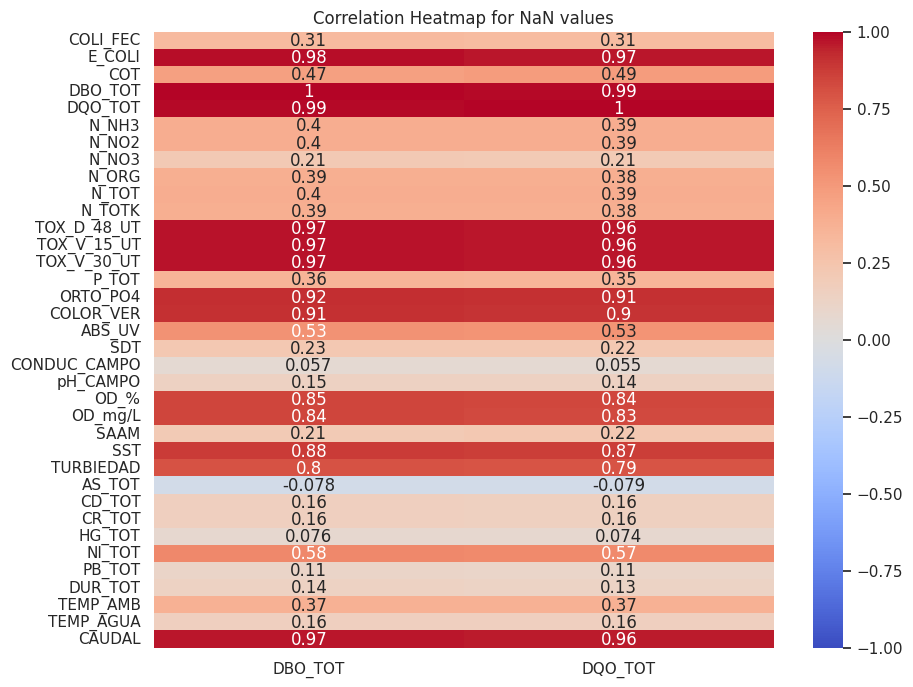

,DBO_TOT,DQO_TOT
COLI_FEC,0.314936,0.311264
E_COLI,0.978140,0.967437
COT,0.468213,0.489161
DBO_TOT,1.000000,0.989185
DQO_TOT,0.989185,1.000000
N_NH3,0.397233,0.391877
N_NO2,0.397233,0.391877
N_NO3,0.211203,0.207590
N_ORG,0.389833,0.384478
N_TOT,0.397842,0.392410


In [ ]:
corr_null = nullity_correlation(df=df_pollulants, lst=['DBO_TOT', 'DQO_TOT'])
corr_null

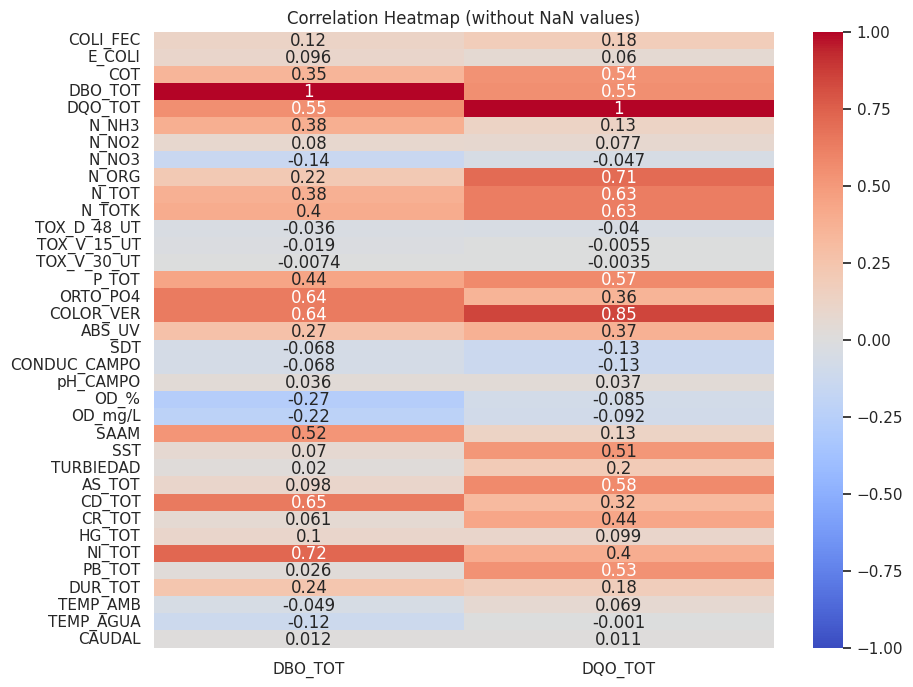

,DBO_TOT,DQO_TOT
COLI_FEC,0.122638,0.180313
E_COLI,0.096055,0.060457
COT,0.349534,0.535184
DBO_TOT,1.000000,0.551144
DQO_TOT,0.551144,1.000000
N_NH3,0.384636,0.126450
N_NO2,0.079917,0.076588
N_NO3,-0.141105,-0.047006
N_ORG,0.216539,0.708685
N_TOT,0.378443,0.631268


In [ ]:
co = nonnull_correlation(df_pollulants, lst=['DBO_TOT', 'DQO_TOT'])
co


In [ ]:
# Function to select the best pairwaise correlation bewteen data correlation and nullity correlation
def best_corr_choice(df1, df2, col):
    mask = co.index != col
    result = abs(df1.loc[mask, col] / df2.loc[mask, col])
    return result.sort_values(ascending=False)

In [ ]:
best = best_corr_choice(co, corr_null, 'DBO_TOT')
best

,DBO_TOT
CD_TOT,4.092350
SAAM,2.507390
DUR_TOT,1.741692
HG_TOT,1.330713
AS_TOT,1.254280
NI_TOT,1.250130
P_TOT,1.233239
CONDUC_CAMPO,1.200040
N_TOTK,1.022287
N_NH3,0.968289


POLLUTANTS = ['OD_mg/L', 'DBO_TOT', 'DQO_TOT', 'COLI_FEC', 'E_COLI', 'N_TOT', 'P_TOT', 'TOX_D_48_UT']

In [ ]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import gaussian_kde
from scipy.spatial.distance import jensenshannon

In [ ]:
print(df_pollulants.columns)


Index(['COLI_FEC', 'E_COLI', 'COT', 'DBO_TOT', 'DQO_TOT', 'N_NH3', 'N_NO2',
       'N_NO3', 'N_ORG', 'N_TOT', 'N_TOTK', 'TOX_D_48_UT', 'TOX_V_15_UT',
       'TOX_V_30_UT', 'P_TOT', 'ORTO_PO4', 'COLOR_VER', 'ABS_UV', 'SDT',
       'CONDUC_CAMPO', 'pH_CAMPO', 'OD_%', 'OD_mg/L', 'SAAM', 'SST',
       'TURBIEDAD', 'AS_TOT', 'CD_TOT', 'CR_TOT', 'HG_TOT', 'NI_TOT', 'PB_TOT',
       'DUR_TOT', 'TEMP_AMB', 'TEMP_AGUA', 'CAUDAL'],
      dtype='object')


In [ ]:
# DataFrame for imputation methods
df_imputation_method = pd.DataFrame()
df= pd.DataFrame()
# Asegúrate de que las columnas de imputación existan y estén correctamente creadas
# Forward Fill
df_imputation_method['DBO_TOT_ffill'] = df_pollulants['DBO_TOT'].fillna(method='ffill', inplace=False)

# Back Fill
df_imputation_method['DBO_TOT_bfill'] = df_pollulants['DBO_TOT'].fillna(method='bfill', inplace=False)

# Rellenar los primeros 3 NaN con 2 en 'DBO_TOT_ffill'
df_imputation_method['DBO_TOT_ffill'].iloc[:3] = df_imputation_method['DBO_TOT_ffill'].iloc[:3].fillna(2)

# Rellenar los últimos 45 NaN con 2 en 'DBO_TOT_bfill'
df_imputation_method['DBO_TOT_bfill'].iloc[-45:] = df_imputation_method['DBO_TOT_bfill'].iloc[-45:].fillna(2)

# KNN Based
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
df_imputation_method['DBO_TOT_knn'] = knn_imputer.fit_transform(df_pollulants[['DBO_TOT']])

# MICE
mice_imputer = IterativeImputer(max_iter=100, random_state=0)
imputed_values = mice_imputer.fit_transform(df_pollulants[['DBO_TOT', 'CD_TOT', 'SAAM','DUR_TOT']])
df_imputation_method['DBO_TOT_mice'] = imputed_values[:, 0]  # La primera columna es 'DBO_TOT'

# MICE
mice_imputer = IterativeImputer(max_iter=100, random_state=0)
imputed_values_II = mice_imputer.fit_transform(df_pollulants)  # This returns a NumPy array

# Create a DataFrame if needed, or directly assign the column
df_imputation_method['DBO_TOT_mice_II'] = imputed_values_II[:, df_pollulants.columns.get_loc('DBO_TOT')]

<ipython-input-22-47ef3c58047f>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_imputation_method['DBO_TOT_ffill'] = df_pollulants['DBO_TOT'].fillna(method='ffill', inplace=False)
<ipython-input-22-47ef3c58047f>:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_imputation_method['DBO_TOT_bfill'] = df_pollulants['DBO_TOT'].fillna(method='bfill', inplace=False)
<ipython-input-22-47ef3c58047f>:12: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical exampl

In [ ]:
df_imputation_method

,DBO_TOT_ffill,DBO_TOT_bfill,DBO_TOT_knn,DBO_TOT_mice,DBO_TOT_mice_II
0,2.0,2.0,6.813926,2.519042,145.981049
1,2.0,2.0,6.813926,4.424131,87.506109
2,2.0,2.0,6.813926,4.568018,14.418095
3,2.0,2.0,2.000000,2.000000,2.000000
4,2.0,9.7,6.813926,2.688830,64.004377
...,...,...,...,...,...
468,2.0,2.0,6.813926,5.557609,6.747950
469,2.0,2.0,6.813926,2.851049,-2.767232
470,2.0,2.0,6.813926,4.719868,52.629309
471,2.0,2.0,6.813926,4.402623,75.969064


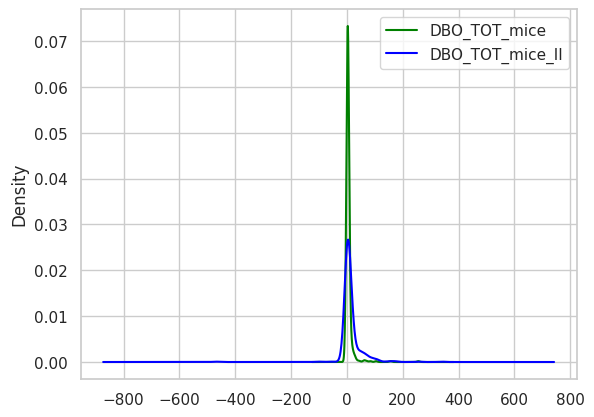

In [ ]:
df_imputation_method['DBO_TOT_mice'].plot(kind='kde',color='green')
df_imputation_method['DBO_TOT_mice_II'].plot(kind='kde',color='blue')
# df_drop_water_sonora['N_TOT'].plot(kind='kde',color='red')

plt.legend([
    'DBO_TOT_mice',
    'DBO_TOT_mice_II',
    # 'Original Distribution'
])
plt.show()

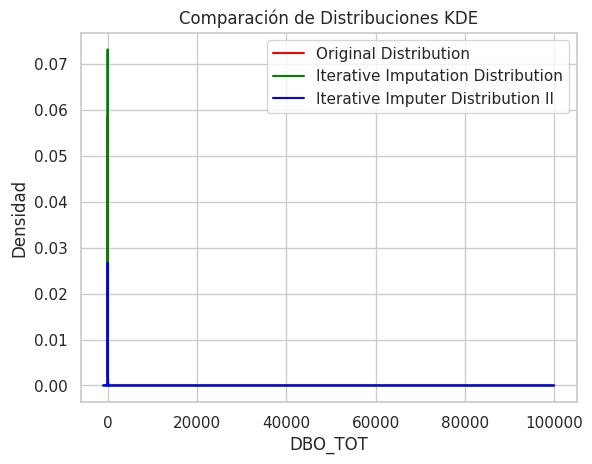

Divergencia de Jensen-Shannon entre 'Iterative Imputer' y 'Original': inf
Divergencia de Jensen-Shannon entre 'Iterative Imputer II' y 'Original': inf


In [ ]:
# Crear un rango común de x para evaluar las KDEs
x_values = np.linspace(-1000, 100000, 100000)

# Calcular KDEs para cada conjunto de datos
kde_original = gaussian_kde(df_drop_water_sonora['DBO_TOT'].replace([np.inf, -np.inf], np.nan).dropna())(x_values)
kde_iterative = gaussian_kde(df_imputation_method['DBO_TOT_mice'])(x_values)
kde_iterative_II = gaussian_kde(df_imputation_method['DBO_TOT_mice_II'])(x_values)

# Graficar las distribuciones KDE
plt.plot(x_values, kde_original, color='red', label='Original Distribution')
plt.plot(x_values, kde_iterative, color='green', label='Iterative Imputation Distribution')
plt.plot(x_values, kde_iterative_II, color='blue', label='Iterative Imputer Distribution II')
plt.legend()
plt.title("Comparación de Distribuciones KDE")
plt.xlabel("DBO_TOT")
plt.ylabel("Densidad")
plt.show()

# Calcular la Divergencia de Jensen-Shannon entre las distribuciones
js_div_iterative_vs_original = jensenshannon(kde_iterative, kde_original)
js_div_iterative_II_vs_original = jensenshannon(kde_iterative_II, kde_original)

print(f"Divergencia de Jensen-Shannon entre 'Iterative Imputer' y 'Original': {js_div_iterative_vs_original}")
print(f"Divergencia de Jensen-Shannon entre 'Iterative Imputer II' y 'Original': {js_div_iterative_II_vs_original}")